# Scipy

Es una biblioteca de código abierto en Python que se usa para resolver problemas
matemáticos, científicos y de ingeniería. La manipulación y visualización de los datos
se puede realizar mediante el uso de múltiples operaciones y funciones disponibles.

## Características principales de SciPy

* Contiene una gran variedad de recursos para la resolución de problemas comunes relacionados con la computación científica
* Actualmente, es la biblioteca más utilizada, solo superada por la GNU Scientific Library para C/C++ o Matlab
* Es fácil de usar y entender, además cuenta con una capacidad de cálculo eficiente.
* Trabaja también con los arrayas de NumPy, porque está construido sobre el mismo.
* Cuenta con una versión completa del álgebra lineal, mientras que Numpy contiene sólo unas pocas características
* La mayoría de las características más avanzadas de la ciencia de datos están disponibiles en Scipy, en lugar de Numpy.

## Paquetes de Scipy

SciPy está dividido en varios módulos, cada uno de ellos enfocado en una tarea específica. Algunos de los módulos más importantes son:

1. **scipy.optimize:**
    - Funciones de optimización, búsqueda de raíces y ajuste de curvas. Puedes encontrar soluciones de ecuaciones, ajustar funciones a datos, y mucho más.
    - Ejemplo: Método de Newton-Raphson (scipy.optimize.newton).
2. **scipy.integrate:**
    - Métodos para realizar integración numérica y resolución de ecuaciones diferenciales ordinarias.
    - Ejemplo: Integración con el método de cuadratura o resolver ecuaciones diferenciales con odeint.
3. **scipy.linalg:**
    - Álgebra lineal avanzada: descomposiciones de matrices, resolución de sistemas de ecuaciones lineales, determinantes, y más.
    - Este módulo es una extensión de numpy.linalg.
4. **scipy.interpolate:**
    - Herramientas para interpolar datos y crear funciones suaves a partir de puntos de datos discretos.
    - Ejemplo: interp1d para interpolación unidimensional.
5. **scipy.stats:**
    - Funciones estadísticas y distribuciones de probabilidad. Esto incluye análisis de datos, pruebas estadísticas, ajuste de distribuciones y generación de distribuciones aleatorias.
    - Ejemplo: Generación de distribuciones normales o cálculo de la media, desviación estándar, etc.
6. **scipy.special:**
    - Implementa funciones especiales matemáticas, como las funciones gamma, error, Bessel, etc., que aparecen comúnmente en muchas ramas de las matemáticas y la física.
7.	**scipy.cluster:**
    - Herramientas para análisis de clustering o agrupamiento, que son útiles en análisis de datos y machine learning.

## Uso práctico de Scipy - Interpolación

Ajustes de curvas e interpolaciones son dos tareas básicas que se realizan con
mucha frecuencia. Por ejemplo, cuando se toman los datos de un experimento:
de antemano se podría saber que se comporta como una parábola, sin embargo por
errores en la medición el resultado no es una parábola exactamente. Por medio de
esos datos que se han recogido, se puede utilizar técnicas de interpolación
polinómica o una técnica llamada splines, que permiten crear una función que sea
capaz de cruzar por dichos puntos y que pueda modelar nuestro experimento.

Nuestro experimento nos ha dado como resultado los siguientes puntos:

<img src="experimento.png" width="400">

Si vemos en la gráfica anterior, tenemos 11 puntos ($N=11$) equiespaciados entre $-5$ y $5$.
Por lo tanto al momento de querer interpolar por medio de un polinomio, deberemos
crear uno que sea de grado $N-1$, o sea un polinomio con $x^{10}$, y esto trae consigo
un problema conocido como fenómeno de Runge y es que a mayor grado el polinomio
este comenzará a oscilar, como se puede ver en la siguiente imagen:

<img src="interpolacion.png" width="400">

Hay una forma alternativa de mejorar esta interpolación y es utilizando las raíces
del Polinomio de Chebyshev, donde los nodos no están equiespaciados, si no que se
encuentran distribuidos cuidadosamente para disminuir la oscilación, sin que sea
eliminada por completo, como se puede ver en la siguiente imagen:

<img src="interpolacion_2.png" width="400">

Sin embargo, como se mencionó al inicio del problema, estos puntos fueron tomados
a partir de un experimento, por lo que la alternativa anterior no me es posible
aplicarla ya que los puntos son fijos. Por lo tanto para solucionar este problema,
podríamos utilizar el método de Splines, para nuestro caso Splines cúbicos, los
utilizarán polinomios de tercer grado para acercar la mejor función posible a los
puntos de nuestro problema. El resultado por este medio será:

<img src="interpolacion_3.png" width="400">

El código para la interpolación es el siguiente:

```python
import numpy as np
from scipy.interpolate import barycentric_interpolate, CubicSpline
import matplotlib.pyplot as plt

# Puntos a interpolar
xp = [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]
yp = [0.03846154, 0.05882353, 0.1, 0.2, 0.5, 1., 0.5, 0.2, 0.1, 0.05882353, 0.03846154]

# Puntos en los que se evalúa la función de interpolación
x = np.linspace(-5, 5, 1000)

# Interpolación Baricéntrica
yb = barycentric_interpolate(xp, yp, x)

# Interpolación por Splines Cúbicos
spline = CubicSpline(xp, yp)
ys = spline(x)

# Gráfica de las interpolaciones
plt.plot(xp,yp, "o")
plt.plot(x, yb, "--", color="green", label="Baricentrica")
plt.plot(x, ys, "-.", color="red", label="Splines")
plt.title("Interpolación")
plt.show()
```

## Actividad

Realizar la interpolación de las sigientes funciones:
- $f(x)=e^{-20x^2}$
- $f(x) = \frac{1}{1+25x^2}$

Utilizando los métodos de Interpolación Baricéntrica y Splines Cúbicos


In [1]:
import numpy as np
import matplotlib.pyplot as plt

xp = [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]
yp = [0.03846154, 0.05882353, 0.1, 0.2, 0.5, 1., 0.5, 0.2, 0.1, 0.05882353, 0.03846154]

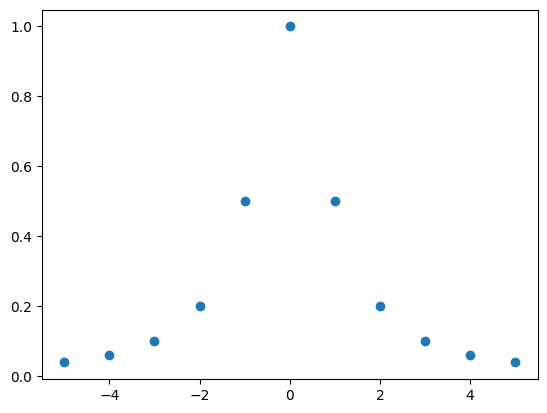

In [3]:
plt.plot(xp, yp, 'o')

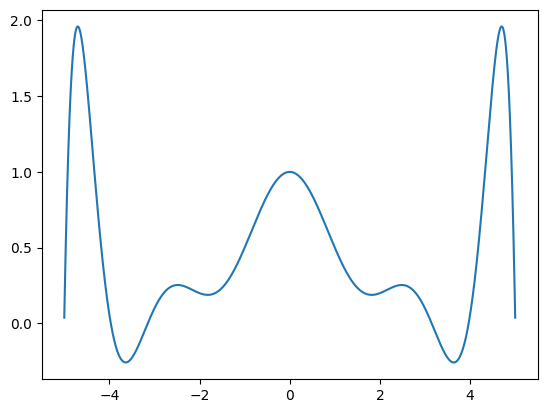

In [10]:
from scipy.interpolate import barycentric_interpolate, CubicSpline

x_evaluar = np.linspace(-5, 5, 100000)

bari = barycentric_interpolate(xp, yp, x_evaluar) # x^10 +a x^9 + ... zx

plt.plot(x_evaluar, bari)

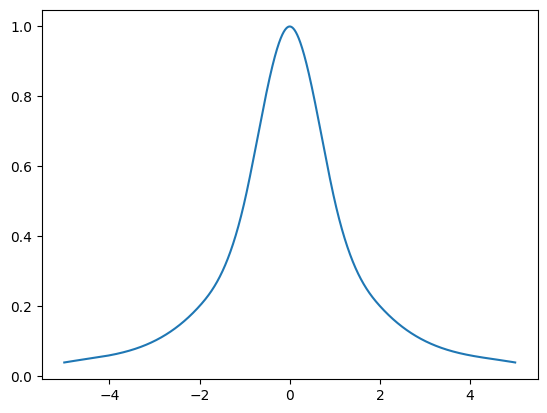

In [11]:
spli = CubicSpline(xp, yp)

nuevo_y = spli(x_evaluar)

plt.plot(x_evaluar, nuevo_y)

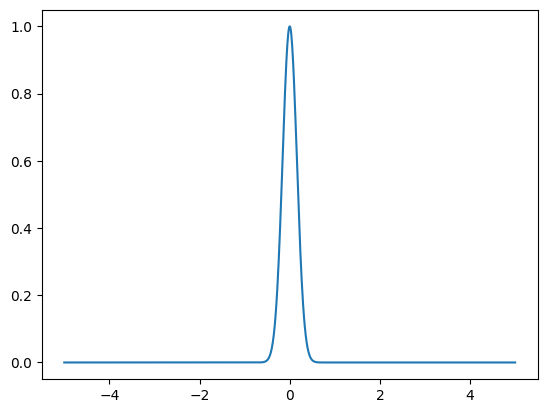

In [ ]:
# e^(-20x^2)

def f1(x):
    return np.e**(-20*x**2)

x1 = np.linspace(-5, 5, 1000)
y1 = f1(x1)

plt.plot(x1, y1)

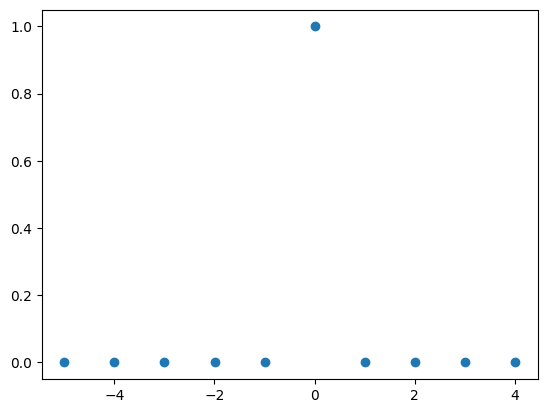

In [29]:
xe = x1[0::100]
ye = y1[0::100]

plt.plot(xe,ye,'o')

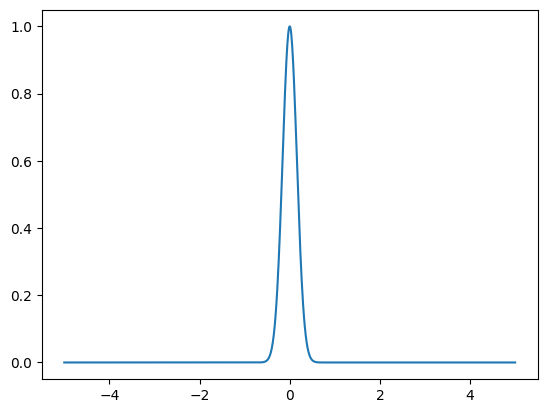

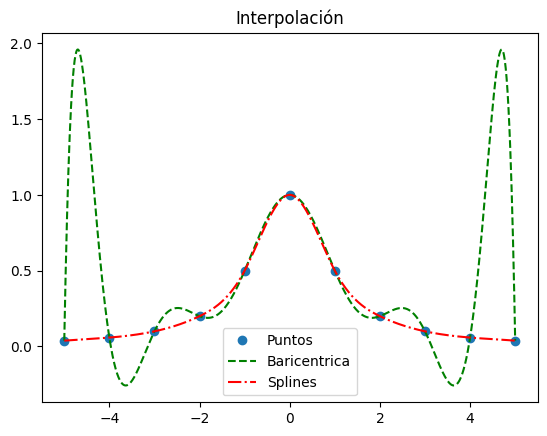

In [24]:
import numpy as np
from scipy.interpolate import barycentric_interpolate, CubicSpline
import matplotlib.pyplot as plt

# Puntos a interpolar
xp = [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]
yp = [0.03846154, 0.05882353, 0.1, 0.2, 0.5, 1., 0.5, 0.2, 0.1, 0.05882353, 0.03846154]

# Puntos en los que se evalúa la función de interpolación
x = np.linspace(-5, 5, 1000)

# Interpolación Baricéntrica
yb = barycentric_interpolate(xp, yp, x)

# Interpolación por Splines Cúbicos
spline = CubicSpline(xp, yp)
ys = spline(x)

# Gráfica de las interpolaciones
plt.plot(xp,yp, "o", label="Puntos")
plt.plot(x, yb, "--", color="green", label="Baricentrica")
plt.plot(x, ys, "-.", color="red", label="Splines")
plt.title("Interpolación")
plt.legend()
plt.show()